# Introduction to Machine Learning

# Unsupervised methods

# Basic supervised machine learning methods

As already explained, supervised methods rely on datasets whose expected ouptut is previously known to train models. Therefore, this kind of machine learning methods rely on several datasets (or partitions of the same dataset) for the development, fine-tuning and evaluation of models:

- **Training dataset:** The initial portion of the available data used to train the model, when the model learns patterns, relationships, and features present in the data. This is acomplished through the machine learning algorithm by optimizing the internal parameters of the model through minimization of the difference between the predicted outputs and the expected output (the labels).

- **Validation dataset:** A separate portion of the data that is not used during the training phase. It serves as an independent set to assess the model's performance during development and hyperparameter tuning, allowing an adjustment to prevent overfitting towards the training data. This dataset and the validation step might be skipped in some cases or substituted by **cross-validation** techniques (see below).

- **Testing dataset:** The testing dataset is another independent portion of the data that is kept completely separate and untouched during both training and validation. It is used to evaluate the final performance of the model after the training and validation phases, providing an unbiased estimate of its ability to generalize to new, unseen data. It helps assess whether the model has learned meaningful patterns after both training and validation instead of simply memorizing specific data.

The process of eividing the original dataset is known as **data splitting**, which tends to favour the training set as the largest sub-dataset and the validation and testing equally smaller. However, the relative sizes can greatly vary between ~60% to ~80% for the training dataset depending on the total size of the dataset and the machine learning method to use. Once the model is fully trained, validated and tested it can be used with new sets of data and generate trustful outputs from which meaningful biological information could be extracted.

![Use of data in supervised learning](images/Scheme1.png)

It is also very important the concept of **feature selection** as part of the data processing steps prior to the use of a supervised method. **Feature selection** algorithms try to find combinations feature subsets, along with an evaluation measure to score them, to optimize the training steps. The idea behind performing this step is that the data might contain some **irrelevant or redundant** features and excluding them provides several advantatges:

- Simpler models are more easy to manage and interpret.
- Simpler models take shorter training times.
- Reducing the dimensionality helps to avoid the curse of dimensionality (as the number of dimensions increases, the amount of data we need to produce accurate generalistic models grows exponentially).

Since it is virtually impossible (computationally intractable) to test each possible subset of features and find the one that minimizes the error for datasets highly multidimensional, there are several types of algorithms that approach this problem classified by the evaluation metrics:


- **Wrapper methods** use a predictive model to score the feature subsets. Each new subset is used to train a model, which is tested on a test set, from which an error rate is obtained as the score for that specific feature subset.


    - **Advantatge**: Usually provide the best performing feature set model and problem-wise.
    - **Disadvantatge**: Very computationally intensive (train a new model for each subset).
    - **Examples**: Recursive Feature Elimination (RFE), Forward Feature Selection (RFS), Backward Feature Elimination (BFE).

<!-- Add an empty line here -->

- **Filter methods** use a statistical metric, a proxy, to score the subsets instead of the error rate. This metric is fast to compute but still able to capture the usefulness of the feature set. Some algorithms also provide a feature ranking rather than the best feature subset, which allows to empirically choose some cutoff threshold through cross-validation techniques (then it is an **Hybrid method**). These methods are also used as a pre-processing step before applying more reliable but computationally expensive Wrapper methods.

    - **Disadvantatge**: The feature subset is not model and problem-wise tunned.
    - **Advantatge**: Usually less computationally intensive than wrappers. Moreover, it does not contain any predictive model assumnptions, so it is more useful for exposing relationships between the features.
    - **Examples**: ANOVA, correlation metrics.

<!-- Add an empty line here -->

- **Embedded methods** is a very diverse group of methods that perform the feature selection step as part of the model construction process. The computational complexity is usually between the one of filter and wrapper methods.

    - **Examples**: LASSO regression and derivates, random forest.

<!-- Add an empty line here -->

- **Hybrid methods** have both characteristic of Wrapper and Filter methods.

    - **Examples**: Recursive Feature Elimination with cross-validation (RFECV)

<!-- Add an empty line here -->

[![Feature selection methods](https://medium.com/analytics-vidhya/feature-selection-extended-overview-b58f1d524c1c)](https://miro.medium.com/v2/resize:fit:720/format:webp/1*9h2qPmOJonbCdthfeVkuyg.jpeg)

## Regression Methods

Regression methods are used to model the output of a continous variable (the dependent variable) based on one or multiple continous explanatory variables (independent variables). These methods aim to model the relationship between the input features and the target variable.

### Linear Regression:

Linear regression is a simple and widely used regression method that models the relationship between the dependent variable and one or more independent variables.

<!-- Add an empty line here -->

[![Linear regression](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/05/2.3.png)](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

<!-- Add an empty line here -->

The model assumes:

- **Linear relationship** between the independent and dependent variables.

<!-- Add an empty line here -->

[![Linear relationship](https://editor.analyticsvidhya.com/uploads/96503linear-nonlinear-relationships.png)](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

<!-- Add an empty line here -->

- **Normality:** Both dependent and independent variables should be normally distributed. It is important to check for deviations of normality both on skweness or kurtosis.

<!-- Add an empty line here -->

[![Normality](https://miro.medium.com/v2/resize:fit:1024/1*OylqZbAZGJJMDiuM1gHUnw.jpeg)](https://medium.com/omics-diary/how-to-test-normality-skewness-and-kurtosis-using-python-18fb2d8e35b9)

<!-- Add an empty line here -->

- **Homoskedasticity:** The model assumes that the error term is constant across the explanatory variable. If the variance of the the error term depends on the explanatory variable, the linear regression model will be innapropiate to model the data (since it assumes a constant variability).

<!-- Add an empty line here -->

[![Homoskedasticity](https://editor.analyticsvidhya.com/uploads/51367residuals.png)](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

<!-- Add an empty line here -->

Therefore, linear regression presents:

**Advantages:**
- Simple and interpretable.
- Fast computation.

**Disadvantages:**
- The model has little no none predictive power beyond assumptions.
- Assumes absence of collinearity between independent variables (if the model includes more than one).

We will try to generate a model that relates some clinical features (phenotype) with a genomic characteristic: the total tumor mutation burden. Mutations, and somatic mutations too, accumulate with time on the body tissues. Tumors arising on older people could show more somatic mutations, and hence, the age of the patient could be used to roughly predict the amount of mutations on their tumors?

In [3]:
clinical_df

,# donor_unique_id,project_code,icgc_donor_id,submitted_donor_id,tcga_donor_uuid,donor_sex,donor_vital_status,donor_diagnosis_icd10,first_therapy_type,first_therapy_response,donor_age_at_diagnosis,donor_survival_time,donor_interval_of_last_followup,tobacco_smoking_history_indicator,tobacco_smoking_intensity,alcohol_history,alcohol_history_intensity,donor_wgs_included_excluded
0,BRCA-UK::CGP_donor_1114930,BRCA-UK,DO1000,CGP_donor_1114930,NaN,female,alive,NaN,other therapy,NaN,61.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included
1,BRCA-UK::CGP_donor_1069291,BRCA-UK,DO1001,CGP_donor_1069291,NaN,female,NaN,NaN,other therapy,NaN,41.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included
2,BRCA-UK::CGP_donor_1114881,BRCA-UK,DO1002,CGP_donor_1114881,NaN,female,alive,NaN,other therapy,unknown,39.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included
3,BRCA-UK::CGP_donor_1114929,BRCA-UK,DO1003,CGP_donor_1114929,NaN,female,alive,C50.4,chemotherapy,unknown,34.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included
4,BRCA-UK::CGP_donor_1167078,BRCA-UK,DO1004,CGP_donor_1167078,NaN,female,deceased,NaN,other therapy,NaN,59.0,NaN,0.0,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,COAD-US::b08b5f49-9434-4653-9772-097ec29b2ca3,COAD-US,DO9708,TCGA-D5-6540,b08b5f49-9434-4653-9772-097ec29b2ca3,male,alive,C18.0,NaN,NaN,66.0,NaN,186.0,NaN,NaN,NaN,NaN,GrayList
2830,COAD-US::bfb07784-693b-4c25-874e-4ad6e04a5d46,COAD-US,DO9732,TCGA-AA-3529,bfb07784-693b-4c25-874e-4ad6e04a5d46,female,deceased,C18.7,NaN,NaN,78.0,0.0,NaN,NaN,NaN,NaN,NaN,Included
2831,COAD-US::7d8eab0a-e6c8-4449-9ebf-50c41db94a06,COAD-US,DO9788,TCGA-A6-2681,7d8eab0a-e6c8-4449-9ebf-50c41db94a06,female,alive,C18.9,NaN,NaN,73.0,NaN,552.0,NaN,NaN,NaN,NaN,Included
2832,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,COAD-US,DO9876,TCGA-AA-A00N,e457344d-76fb-46bf-b362-61a6e811d131,male,deceased,C18.0,NaN,NaN,75.0,122.0,NaN,NaN,NaN,NaN,NaN,Included


In [7]:
merged_df

,# donor_unique_id,project_code,icgc_donor_id,submitted_donor_id,tcga_donor_uuid,donor_sex,donor_vital_status,donor_diagnosis_icd10,first_therapy_type,first_therapy_response,donor_age_at_diagnosis,donor_survival_time,donor_interval_of_last_followup,tobacco_smoking_history_indicator,tobacco_smoking_intensity,alcohol_history,alcohol_history_intensity,donor_wgs_included_excluded,donor,TMB_proxy
0,BRCA-UK::CGP_donor_1114930,BRCA-UK,DO1000,CGP_donor_1114930,NaN,female,alive,NaN,other therapy,NaN,61.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included,DO1000,2121.291957
1,BRCA-UK::CGP_donor_1069291,BRCA-UK,DO1001,CGP_donor_1069291,NaN,female,NaN,NaN,other therapy,NaN,41.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included,DO1001,6092.710103
2,BRCA-UK::CGP_donor_1114881,BRCA-UK,DO1002,CGP_donor_1114881,NaN,female,alive,NaN,other therapy,unknown,39.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included,DO1002,5916.251210
3,BRCA-UK::CGP_donor_1114929,BRCA-UK,DO1003,CGP_donor_1114929,NaN,female,alive,C50.4,chemotherapy,unknown,34.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included,DO1003,5111.594334
4,BRCA-UK::CGP_donor_1167078,BRCA-UK,DO1004,CGP_donor_1167078,NaN,female,deceased,NaN,other therapy,NaN,59.0,NaN,0.0,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,Included,DO1004,11992.924492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,COAD-US::b08b5f49-9434-4653-9772-097ec29b2ca3,COAD-US,DO9708,TCGA-D5-6540,b08b5f49-9434-4653-9772-097ec29b2ca3,male,alive,C18.0,NaN,NaN,66.0,NaN,186.0,NaN,NaN,NaN,NaN,GrayList,DO9708,89012.339804
2655,COAD-US::bfb07784-693b-4c25-874e-4ad6e04a5d46,COAD-US,DO9732,TCGA-AA-3529,bfb07784-693b-4c25-874e-4ad6e04a5d46,female,deceased,C18.7,NaN,NaN,78.0,0.0,NaN,NaN,NaN,NaN,NaN,Included,DO9732,18172.438417
2656,COAD-US::7d8eab0a-e6c8-4449-9ebf-50c41db94a06,COAD-US,DO9788,TCGA-A6-2681,7d8eab0a-e6c8-4449-9ebf-50c41db94a06,female,alive,C18.9,NaN,NaN,73.0,NaN,552.0,NaN,NaN,NaN,NaN,Included,DO9788,14793.920524
2657,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,COAD-US,DO9876,TCGA-AA-A00N,e457344d-76fb-46bf-b362-61a6e811d131,male,deceased,C18.0,NaN,NaN,75.0,122.0,NaN,NaN,NaN,NaN,NaN,Included,DO9876,791924.087446


In [4]:
from os import path
import pandas as pd
import numpy as np

# To ignore some plot warnings
import warnings
warnings.filterwarnings('ignore')

# Load the clinical information of patients
clinical_df = pd.read_excel('data/pcawg_donor_clinical_August2016_v9.xlsx')

# Load the clinical information of patients
sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep='\t', header='infer')
specimen_dict = dict(zip(sample_df.icgc_specimen_id, sample_df.icgc_donor_id))

TMB_df = pd.read_csv(path.join('data', 'TMB.tsv.gz'), sep='\t', header='infer', compression='gzip')
TMB_df['donor'] = TMB_df['specimenID'].map(specimen_dict)
aa
# There are more than one tumoral specimen per donor
TMB_df['donor'].value_counts()

# Since the analysis is performed by donor clinical data, we can take the mean value across specimens
TMB_df.groupby('donor')
TMB_clean_df = TMB_df.groupby('donor')['TMB_proxy'].mean().to_frame().reset_index()

# Merge the dataframes
merged_df = pd.merge(clinical_df, TMB_clean_df, left_on='icgc_donor_id', right_on='donor', how='inner')

One of the problems we might encounter during the training of models is **missing data** in one of the variables used by the model. There are multiple ways to deal with that, the most simple (but more restrictive) is excluding any data element whose value on some feature is unknown.

In [11]:
# Check the total amount of donors.
print('Total donors: ' + str(len(merged_df)))
# Drop rows with missing values in either TMB or donor_age_at_diagnosis:
df_regression = merged_df[['TMB_proxy', 'donor_age_at_diagnosis']].dropna()
# Note that around 100 donors are dropped from analysis due to non-available age at diagnosis data.
# This is not a huge proportion.
print('Donors with available age at diagnosis: ' + str(len(df_regression)))

Total donors: 2659
Donors with available age at diagnosis: 2530


Shapiro-Wilk p-value for TMB: 0.0
Shapiro-Wilk p-value for Age at Diagnosis: 1.6071289179323693e-37


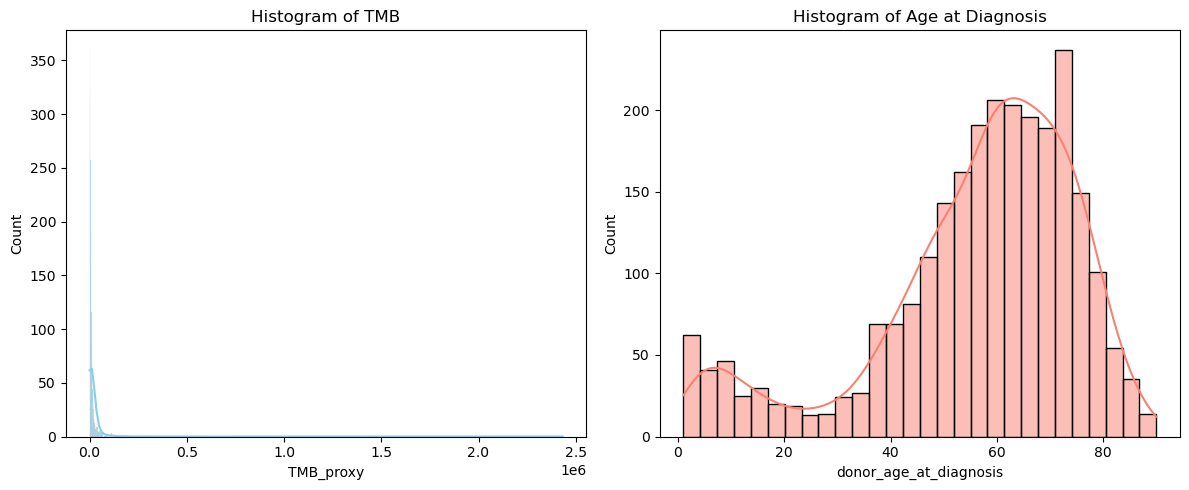

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Check for normality using Shapiro-Wilk test
_, p_value_tmb = shapiro(df_regression['TMB_proxy'])
_, p_value_age = shapiro(df_regression['donor_age_at_diagnosis'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for TMB: {p_value_tmb}')
print(f'Shapiro-Wilk p-value for Age at Diagnosis: {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_regression['TMB_proxy'], kde=True, color='skyblue')
plt.title('Histogram of TMB')

plt.subplot(1, 2, 2)
sns.histplot(df_regression['donor_age_at_diagnosis'], kde=True, color='salmon')
plt.title('Histogram of Age at Diagnosis')

plt.tight_layout()
plt.show()

Definetly, the two variables do not follow a normal distribution at all. The first outcome of this fact is that a linear regression model is not suitable for modelling this type of data. However, there are ways to partially solve this problem by adapting the model through transformation of the variables, although this will have implications on the interpretation of the model, since the linearity will be between two transformed variables.

Shapiro-Wilk p-value for log TMB: 1.6485460161528369e-19
Shapiro-Wilk p-value for Age at Diagnosis (box cox): 8.951686685555911e-24


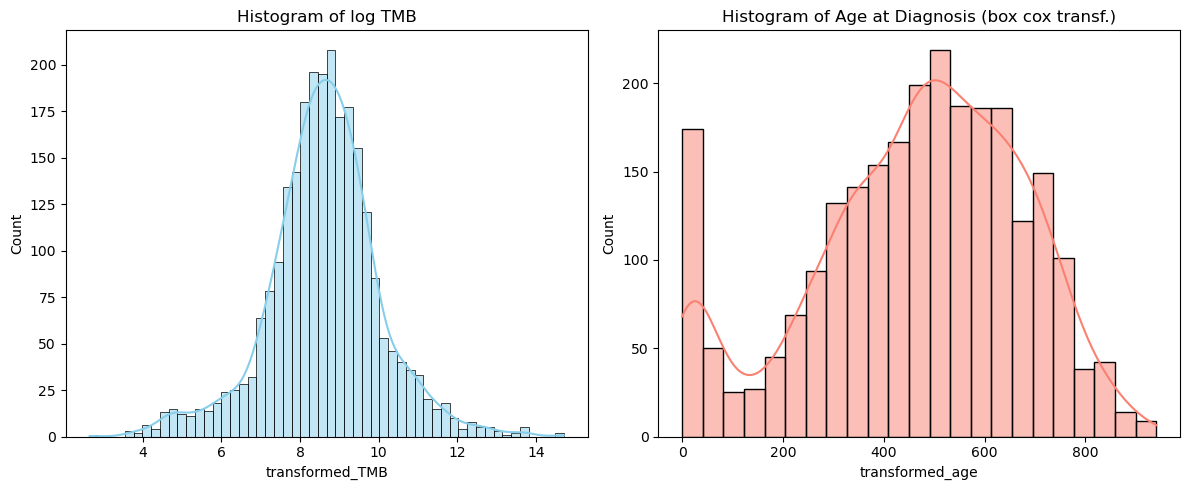

In [13]:
# We can try to apply some transformations:
## A logarithmic transformation for the TMB could work well
## (it looks like a gamma distribution or other long-tailed distributions)
df_regression['transformed_TMB'] = np.log1p(df_regression['TMB_proxy'])

# The age seems to arise from a mixture of two normal distributions, a boxcox transformation might help
from scipy.stats import boxcox
df_regression['transformed_age'] = boxcox(df_regression['donor_age_at_diagnosis'])[0]

# Check for normality using Shapiro-Wilk test
_, p_value_tmb = shapiro(df_regression['transformed_TMB'])
_, p_value_age = shapiro(df_regression['transformed_age'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for log TMB: {p_value_tmb}')
print(f'Shapiro-Wilk p-value for Age at Diagnosis (box cox): {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_regression['transformed_TMB'], kde=True, color='skyblue')
plt.title('Histogram of log TMB')

plt.subplot(1, 2, 2)
sns.histplot(df_regression['transformed_age'], kde=True, color='salmon')
plt.title('Histogram of Age at Diagnosis (box cox transf.)')

plt.tight_layout()
plt.show()

Still after the transformations the distributions do not look normal at all, which is reflected on the Shapiro-Wilk test. We can do a deeper analysis with qpplots.

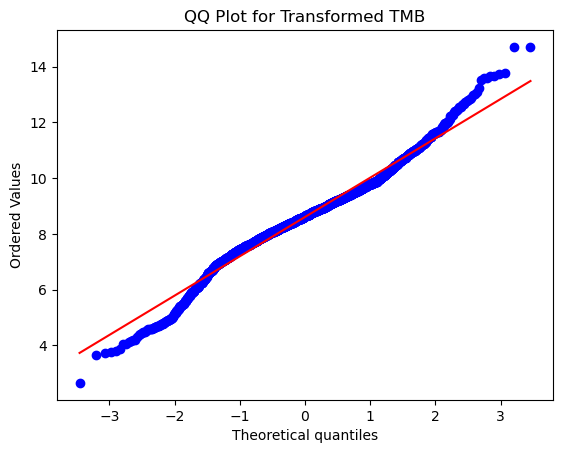

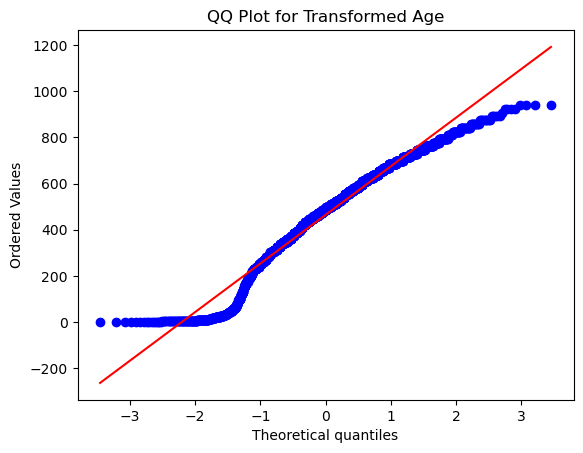

In [14]:
# Create a quantile-quantile plot for the transformed TMB
probplot(df_regression['transformed_TMB'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed TMB')
plt.show()

# Create a quantile-quantile plot for the transformed age
probplot(df_regression['transformed_age'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed Age')
plt.show()

The qqplot from the logarithm of TMB indicates negative kurtosis (data too accumulated on the peak): the distribution is leptokurtic. With respect to the age at diagnosis, still the distribution is bimodal. Still, we can train a linear regression model and test it with a subset of the data to see the distribution of the error.

Intercept: 7.180993311074819
Age Coefficient: 0.003081434485871226
Root of the mean squared error: 1.258663734584752


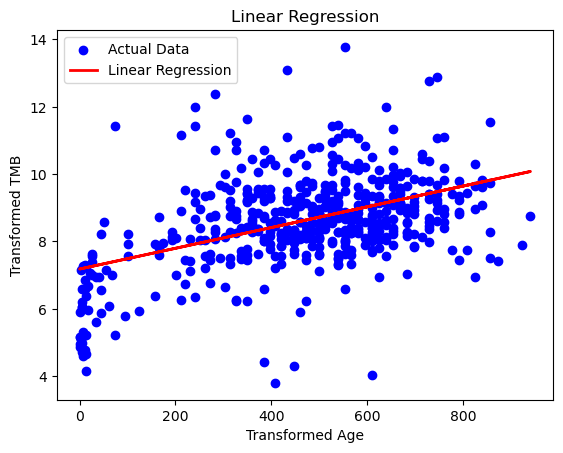

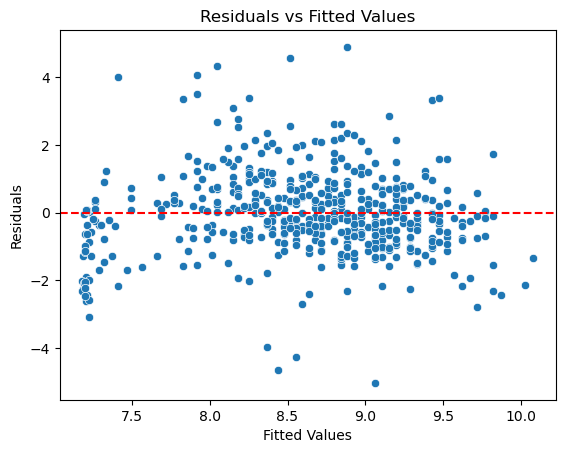

In [15]:
# Perform linear regression
y = df_regression['transformed_TMB']
X = df_regression['transformed_age'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Age Coefficient: {model.coef_[0]}')

# Get the root of the mean squared error as a metric of the fit
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of the mean squared error: {rmse}')

# Scatter plot of the original data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')

# Labeling the plot
plt.title('Linear Regression')
plt.xlabel('Transformed Age')
plt.ylabel('Transformed TMB')
plt.legend()

# Show the plot
plt.show()

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Not only the variables follow a normal distribution but also the variance of the residuals is not constant across the predicted values when evaluated with the test dataset: there is heteroskedasticity (specifically, there is a larger variance for low ages of diagnosis).

Still there are ways to process the data and try to train a better model. With respect to the age at diagnosis, there are two populations: pediatric cancers and non-pediatric ones. The pediatric cancers usually arise from predisposition syndromes (germline mutations that predispose to develop a cancer), with different mutational dynamics in terms of mutation load than other cancers, which are hypothesized to arise from the accumulation of somatic mutations with time. Hence, we can try to exclude the pediatric cancers and model the relationship of the age and tumor mutation burden for non-pediatric neoplasies.

There are two projects including pediatric cancers: the ones from the PBCA-DE cohort (pediatric brain cancer) and some donors from the malignant lymphomas MALY-DE cohort (which also is a bimodal, whith pediatric lymphomas).

project_code
PBCA-DE    184
MALY-DE     22
KICH-US      1
MELA-AU      1
LGG-US       1
THCA-US      1
PAEN-AU      1
Name: count, dtype: int64


<Axes: >

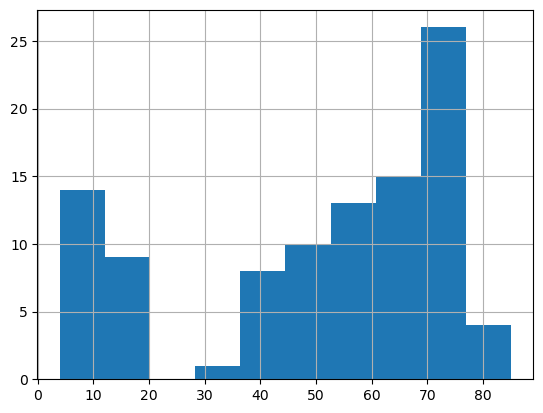

In [10]:
print(merged_df[merged_df['donor_age_at_diagnosis']<18]['project_code'].value_counts())

merged_df[merged_df['project_code']=='MALY-DE']['donor_age_at_diagnosis'].hist()

Total donors: 2659
Non-pediatric donors with available age at diagnosis: 2282
Shapiro-Wilk p-value for log TMB: 2.1718315626595563e-21
Shapiro-Wilk p-value for Age at Diagnosis: 1.0550276049249878e-15


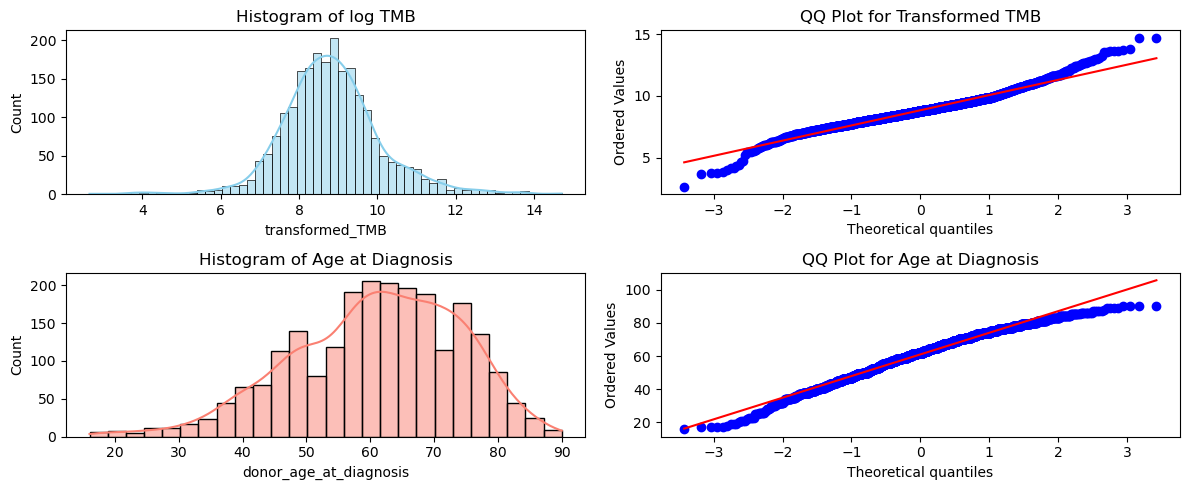

In [11]:
# Find total donors with TMB computed
print('Total donors: ' + str(len(merged_df)))
# Remove pediatric brain cancers and pediatric malignant lymphomas
df_regression = merged_df[(merged_df['project_code']!='PBCA-DE')&~((merged_df['project_code']=='MALY-DE')&(merged_df['donor_age_at_diagnosis']<20))][['TMB_proxy', 'donor_age_at_diagnosis']].dropna().copy()

# Now more than 300 donors are dropped from analysis
print('Non-pediatric donors with available age at diagnosis: ' + str(len(df_regression)))

# A logarithmic transformation for the TMB (exponential, long-tailed distribution)
df_regression['transformed_TMB'] = np.log1p(df_regression['TMB_proxy'])

# Check for normality using Shapiro-Wilk test
_, p_value_tmb = shapiro(df_regression['transformed_TMB'])
_, p_value_age = shapiro(df_regression['donor_age_at_diagnosis'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for log TMB: {p_value_tmb}')
print(f'Shapiro-Wilk p-value for Age at Diagnosis: {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
sns.histplot(df_regression['transformed_TMB'], kde=True, color='skyblue')
plt.title('Histogram of log TMB')

plt.subplot(2, 2, 3)
sns.histplot(df_regression['donor_age_at_diagnosis'], kde=True, color='salmon')
plt.title('Histogram of Age at Diagnosis')

# Create a quantile-quantile plot for the transformed TMB
plt.subplot(2, 2, 2)
probplot(df_regression['transformed_TMB'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed TMB')

# Create a quantile-quantile plot for the transformed age
plt.subplot(2, 2, 4)
probplot(df_regression['donor_age_at_diagnosis'], dist="norm", plot=plt)
plt.title('QQ Plot for Age at Diagnosis')

plt.tight_layout()
plt.show()

With this change, now the independent variable approximates more a normal distribution although the qqplot shows that is negatively skewed. This can be partially corrected with another transformation, using the square of the variable.

Shapiro-Wilk p-value for square Age at Diagnosis: 5.5753806016412e-09


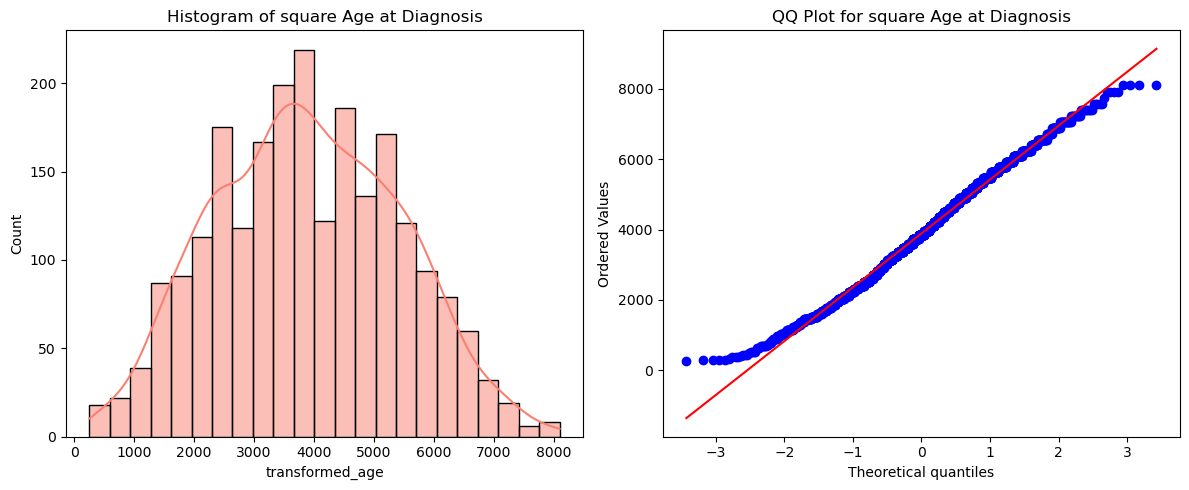

In [12]:
# A square transformation for the age at diagnosis might helpt with the negative skewness
df_regression['transformed_age'] = np.square(df_regression['donor_age_at_diagnosis'])

# Check for normality using Shapiro-Wilk test
_, p_value_age = shapiro(df_regression['transformed_age'])

# Definitely the two variables do not follow a normal distribution
print(f'Shapiro-Wilk p-value for square Age at Diagnosis: {p_value_age}')

# Plot histograms for TMB and donor_age_at_diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_regression['transformed_age'], kde=True, color='salmon')
plt.title('Histogram of square Age at Diagnosis')

plt.subplot(1, 2, 2)
probplot(df_regression['transformed_age'], dist="norm", plot=plt)
plt.title('QQ Plot for square Age at Diagnosis')

plt.tight_layout()
plt.show()

Now the age at diagnosis has some level of positive kurticity: it is platykurtic. Still the transformation helped to fit better the data into the assumptions. 

Intercept: 8.162287557100909
Age square Coefficient: 0.0001700212064541462
Root of Mean Squared Error: 1.26841048634698


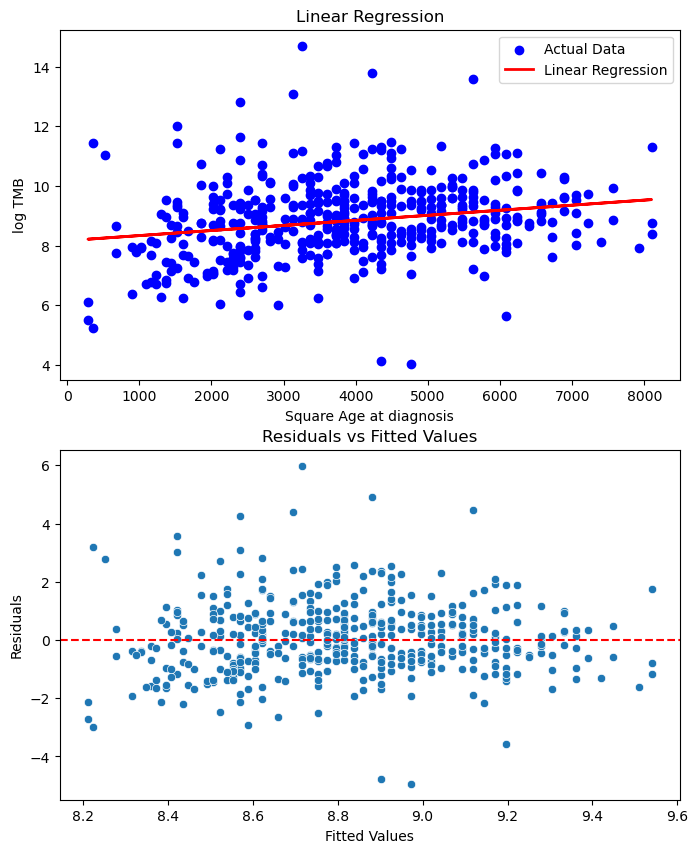

In [13]:
# Perform linear regression
y = df_regression['transformed_TMB']
X = df_regression['transformed_age'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Age square Coefficient: {model.coef_[0]}')

# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Scatter plot of the original data
ax1.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
ax1.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')

# Labeling the plot
ax1.set_title('Linear Regression')
ax1.set_xlabel('Square Age at diagnosis')
ax1.set_ylabel('log TMB')
ax1.legend()

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=ax2)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Values')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'Age_TMB_LinearRegression.png'))
fig.show()

Now there is a pattern of residuals that better fits homoskedasticity and the variables approach more a normal distribution than before the transformations. The root of the mean square error is slightly higher but similar when removing the pediatric tumors. However, does this mean that it is a model with a good predictive power? No, using the age at diagnosis to predict the expected TMB with this model will be a terrible decision. Let's see why is that by interpreting what has been obtained.

The first plot shows that even if there seems to be a positive trend between the square of the age at diagnosis vs the log of the TMB, there is a large variance in the log TMB unexplained by the square of the age at diagnosis alone which renders the predictive model useless.

This is somehow reflected on the RMSE value and the residuals vs fitted values plots, which remember that are computed for a dependent variable transformed into logrithmic scale: this largely complicates the interpretation of the metric (https://stats.stackexchange.com/questions/314490/regression-rmse-when-dependent-variable-is-log-transformed). Long story short, a RMSE computed from a log-transformation looses its original units and cannot be interpreted anymore as number of mutations but as % of deviations from the geometric mean (which in our case translates into orders of magnitude of difference of error for TMB).

### Polynomial Regression:

Polynomial regression is an extension of linear regression, allowing for the modeling of non-linear relationships. It includes higher-order terms of the independent variable, which allows to capture non-linear relationships in contrast to linear regressions. Therefore:

**Advantages:**
- Captures non-linear relationships.

**Disadvantages:**
- May overfit the data.
- Assumes absence of collinearity between independent variables (if the model includes more than one).

Although the total TMB and the number of mutations attrributed to a specific signature are strictly related (one is a subset of another), the proportion of mutations should be independent (it is independent from the total number of mutations as it has been corrected by them). However, tumors whose somatic mutation burden is dominated by specific mutational processes usually show an hypermutation phenotype, for instance melanomas are hypermutated cancers mostly dominated by signature 7 (UV-light derived mutations) or signature 10 (associated with Polymerase-Epsilon deficient *POLE* mutants) in colorectal and endometrial cancers.

We can try to model the logarithm of the TMB (the order of magnitude) based on signature proportions, whose relationship is not expected to be completely linear. Which signatures are relevant for this, and what problems pose to work with proportions as independent variables?

In [19]:
# Load the signatures data
raw_signatures_df = pd.read_csv(path.join('data' , 'signatures.tsv.gz'), sep='\t', header='infer', compression='gzip')
raw_signatures_df = raw_signatures_df.set_index('signature')

# Traspose and reorganize index to have as columns (independent variables) each signature
raw_signatures_df = raw_signatures_df.transpose().reset_index()

# Some signatures that were extracted at the start of the cancer genomics field were subdivided into more components
# (7 was subdivided into 7a, 7b and 7c while 17 into 17a and 17b). To simplify we will merge into one component.
# Create new columns by summing the specified columns
raw_signatures_df['SBS7a'] = raw_signatures_df[['SBS7a', 'SBS7b', 'SBS7c']].sum(axis=1)
raw_signatures_df['SBS17a'] = raw_signatures_df[['SBS17a', 'SBS17b']].sum(axis=1)
# Rename the columns ('index' column to 'specimenID' and the others)
raw_signatures_df = raw_signatures_df.rename(columns={'index': 'specimenID', 
                                              'SBS7a': 'SBS7', 
                                              'SBS17a': 'SBS17',
                                              'SBS10a': 'SBS10'})
# Drop the original columns if needed and also drop
raw_signatures_df = raw_signatures_df.drop(['SBS7b', 'SBS7c', 'SBS17b', 'SBS60', 'SBS83'], axis=1)

# Normalize the values in each column to generate the proportions of each signature
prop_signatures_df = raw_signatures_df.iloc[:, 1:].div(raw_signatures_df.iloc[:, 1:].sum(axis=1), axis=0)
prop_signatures_df.insert(0, 'specimenID', raw_signatures_df['specimenID'])

# Load the TMB data
TMB_df = pd.read_csv(path.join('data' , 'TMB.tsv.gz'), sep='\t', header='infer', compression='gzip')
TMB_df ['transformed_TMB'] = np.log1p(TMB_df ['TMB_proxy'])

# Merge with the signatures dataframe to get the dependent variable
signatures_df = pd.merge(prop_signatures_df, TMB_df , left_on='specimenID', right_on='specimenID', how='inner')

In [20]:
signatures_df

,specimenID,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7,SBS8,SBS9,...,SBS76,SBS77,SBS78,SBS79,SBS80,SBS81,SBS82,hist_type,TMB_proxy,transformed_TMB
0,SP117655,0.106908,0.077932,0.0,0.0,1.429678e-01,0.000000,0.000000,0.113724,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Biliary_AdenoCA,14868.992600,9.607101
1,SP117556,0.226216,0.030688,0.0,0.0,1.197153e-01,0.000000,0.000000,0.088559,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Biliary_AdenoCA,5072.446116,8.531776
2,SP117627,0.283933,0.118230,0.0,0.0,1.476718e-175,0.000000,0.000000,0.141144,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Biliary_AdenoCA,5837.270352,8.672190
3,SP117775,0.184205,0.104655,0.0,0.0,8.619355e-02,0.000000,0.000000,0.052741,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Biliary_AdenoCA,12426.775021,9.427689
4,SP117332,0.173352,0.142013,0.0,0.0,1.043116e-01,0.000000,0.000000,0.044318,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Biliary_AdenoCA,3427.951291,8.140010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,SP83099,0.021743,0.000000,0.0,0.0,0.000000e+00,0.000198,0.654114,0.000000,0.005957,...,0.0,0.0,0.0,0.0,0.0,8.501045e-05,0.0,Skin_Melanoma,22261.560781,10.010662
2776,SP83146,0.001228,0.000000,0.0,0.0,0.000000e+00,0.000034,0.839187,0.000000,0.000957,...,0.0,0.0,0.0,0.0,0.0,6.562287e-06,0.0,Skin_Melanoma,348647.808151,12.761820
2777,SP103866,0.004929,0.000000,0.0,0.0,0.000000e+00,0.000120,0.765229,0.000000,0.003378,...,0.0,0.0,0.0,0.0,0.0,5.891708e-25,0.0,Skin_Melanoma,94879.104988,11.460369
2778,SP83844,0.004177,0.000000,0.0,0.0,0.000000e+00,0.000144,0.811273,0.000000,0.004417,...,0.0,0.0,0.0,0.0,0.0,8.261201e-06,0.0,Skin_Melanoma,56958.008549,10.950087


In [32]:
sub_signatures_df = signatures_df[signatures_df['hist_type']=='Skin_Melanoma']

In [33]:
sub_signatures_df

,specimenID,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7,SBS8,SBS9,...,SBS76,SBS77,SBS78,SBS79,SBS80,SBS81,SBS82,hist_type,TMB_proxy,transformed_TMB
2673,SP124389,0.002739,0.0,0.0,0.0,0.0,0.000115,0.889222,0.0,0.001389,...,0.0,0.0,0.0,0.0,0.0,7.916075e-304,0.0,Skin_Melanoma,70868.453793,11.168595
2674,SP124362,0.001678,0.0,0.0,0.0,0.0,0.000030,0.802376,0.0,0.000923,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Skin_Melanoma,214668.985150,12.276857
2675,SP124394,0.002014,0.0,0.0,0.0,0.0,0.000051,0.805403,0.0,0.001553,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Skin_Melanoma,105940.264585,11.570640
2676,SP124334,0.003839,0.0,0.0,0.0,0.0,0.000063,0.732822,0.0,0.011980,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,Skin_Melanoma,87606.359062,11.380620
2677,SP124339,0.090562,0.0,0.0,0.0,0.0,0.000336,0.100518,0.0,0.053731,...,0.0,0.0,0.0,0.0,0.0,4.797305e-04,0.0,Skin_Melanoma,2745.197311,7.917972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,SP83099,0.021743,0.0,0.0,0.0,0.0,0.000198,0.654114,0.0,0.005957,...,0.0,0.0,0.0,0.0,0.0,8.501045e-05,0.0,Skin_Melanoma,22261.560781,10.010662
2776,SP83146,0.001228,0.0,0.0,0.0,0.0,0.000034,0.839187,0.0,0.000957,...,0.0,0.0,0.0,0.0,0.0,6.562287e-06,0.0,Skin_Melanoma,348647.808151,12.761820
2777,SP103866,0.004929,0.0,0.0,0.0,0.0,0.000120,0.765229,0.0,0.003378,...,0.0,0.0,0.0,0.0,0.0,5.891708e-25,0.0,Skin_Melanoma,94879.104988,11.460369
2778,SP83844,0.004177,0.0,0.0,0.0,0.0,0.000144,0.811273,0.0,0.004417,...,0.0,0.0,0.0,0.0,0.0,8.261201e-06,0.0,Skin_Melanoma,56958.008549,10.950087


We can start to check the relationship of some specific signatures with the total TMB. For instance, starting with signature SBS4 (tobacco).

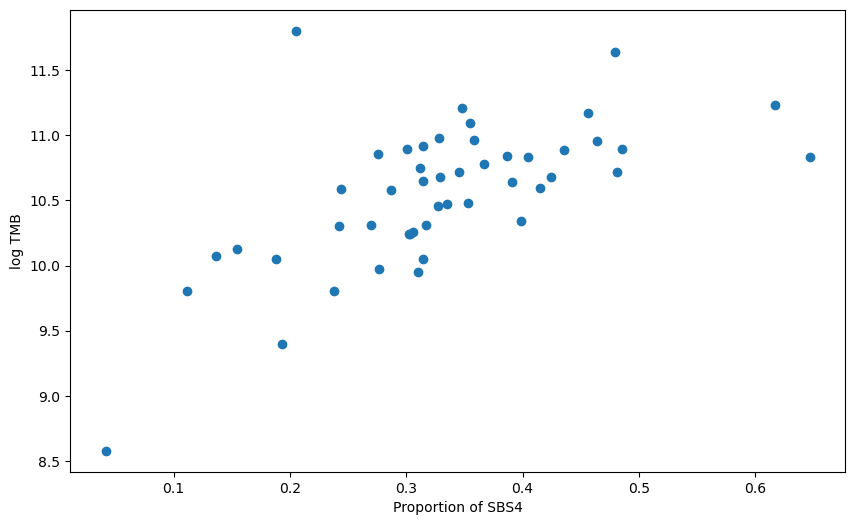

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import probplot

# Select features (only signature 4) and target (log of TMB)
X = sub_signatures_df[['SBS4']].values
y = sub_signatures_df['transformed_TMB'].values

plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.xlabel('Proportion of SBS4')
plt.ylabel('log TMB')

plt.show()

Most of the data points do not show any contributtion of tobacco (probably non-lung cancer types where tobacco-derived mutagens cannot reach or non-smoker patients). However, with respect to the samples that have mutations attributed to tobacco, the relationship is not lineal as the order of magnitude of mutations seem to reach a plateau as the proportion increases.

Intercept: 7.180993311074819
Coefficient of SBS4 proportion square: 0.003081434485871226
Root of Mean Squared Error: 0.635652948482503
R^2 score: -1.0242910157554785


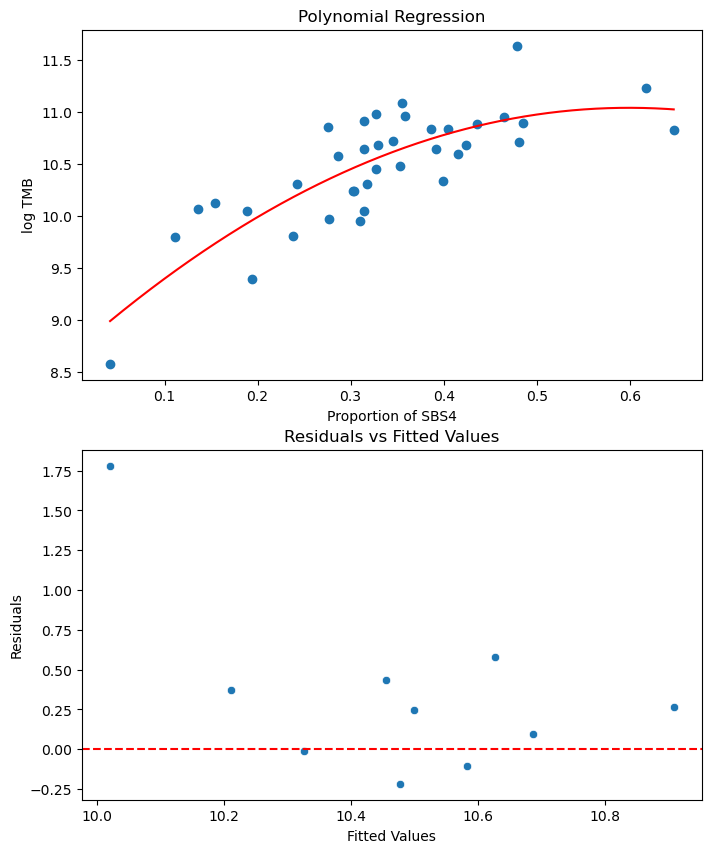

In [28]:
# We can build a polynomial model only using this variable as explanatory
from sklearn.preprocessing import PolynomialFeatures
# Skicit learn also allows to use pipelines for models
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
    
# First we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will work with a second degree polynomial, that will be enough
degree = 2
# We will define that the features are polinomial and define a linear model to solve a polinomial transformation
pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
# Fit our data points into our pipeline
pm.fit(X_train, y_train)

# Predict on the test set
y_pred = pm.predict(X_test)
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient of SBS4 proportion square: {model.coef_[0]}')
# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')
# Print rsquare score (amount of variance of the dependent variable explained by the independent one)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

# Generate some values to print the a continous polynomial function
X_values = np.linspace(min(X_train), max(X_train), 1000).reshape(-1, 1)
# Predict the values from our polynomial regression model
y_predict = pm.predict(X_values)
 
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(X_train, y_train)  # plot original data points
ax1.set_title('Polynomial Regression')
ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
ax1.set_xlabel('Proportion of SBS4')
ax1.set_ylabel('log TMB')

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Values')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'SBS4_TMB_PolynomialRegression.png'))
fig.show()

You might have notice that the model has been built using a pipeline, where the features are transformed with `PolynomialFeatures(degree=degree, include_bias=False)` and then passed to a linear regression through `LinearRegression()`. Why is that? 

For a detailed explanation on why the include_bias=False while initializing the polynomial model object, you can check https://stackoverflow.com/questions/59725907/scikit-learn-polynomialfeatures-what-is-the-use-of-the-include-bias-option, but long story short by default it assumes that the intercept is non-zero. Why to assume for starters that the intercept is 0? Since we will transform the data to work with a linear model, the intercept problem is taken care on the *LinearRegression* object so there is no need include the bias term while initializing the polynomial model.

Moreover, why we use the `LinearRegression()`function if now we do not assume a linear relationship? This is just the way skicit-learn works, by first defining the a polynomial model with `PolynomialFeatures()` and then we instruct to train the model with the regression (solve the coefficients based on the training data of the polynomial function).

A quick look might suggest that specimens were at least tobacco-related mutations are present tend to have a higher total tumor mutation burden in logarithmic scale. However, only using this signature is not enough to have a good predictive model. As reflected on the rather large RMSE, lots of samples do not carry any mutation attributed to tobacco but still there is a large variability of log TMB due to other mutational processes. This is reflected on a huge heteroskedasticity.

Since a lot of variability in log TMB is not explained by the tobacco signature, we could include other relevant signatures. For instance, signature 7 (attributed to UV-light exposition)

Intercept: 7.180993311074819
Coefficient of SBS7 proportion square: 0.003081434485871226
Root of Mean Squared Error: 0.8935808400592834
R^2 score: 0.6809637727248367


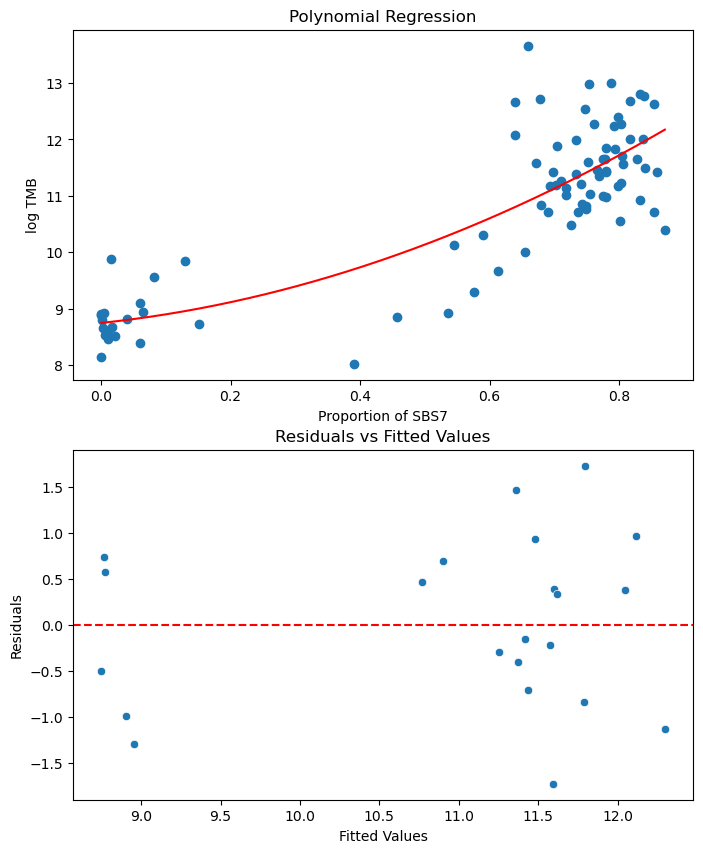

In [36]:
# Select features (only signature 4) and target (log of TMB)
X = sub_signatures_df[['SBS7']].values
y = sub_signatures_df['transformed_TMB'].values

# First we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will work with a second degree polynomial, that will be enough
degree = 2
# We will define that the features are polinomial and define a linear model to solve a polinomial transformation
pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
# Fit our data points into our pipeline
pm.fit(X_train, y_train)

# Predict on the test set
y_pred = pm.predict(X_test)
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient of SBS7 proportion square: {model.coef_[0]}')
# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')
# Print rsquare score (amount of variance of the dependent variable explained by the independent one)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

# Generate some values to print the a continous polynomial function
X_values = np.linspace(min(X_train), max(X_train), 1000).reshape(-1, 1)
# Predict the values from our polynomial regression model
y_predict = pm.predict(X_values)
 
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(X_train, y_train)  # plot original data points
ax1.set_title('Polynomial Regression')
ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
ax1.set_xlabel('Proportion of SBS7')
ax1.set_ylabel('log TMB')

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Values')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'SBS7_TMB_PolynomialRegression.png'))
fig.show()

Here the relationship seems different, where the pipeline build a polynomial model that approximates the relationship through two differentiated populations: samples with low contribution of the UV-light signature seem to have more mutations that the mean across samples with no presence of this signature but still lower than a population of hypermutated samples that tend to have high proportions of SBS7 signature (intermediate samples are almost non-existent).

Now let's see what is the relationship with signatures largely common across specimens like SBS1, which have been attributed to the background processes that generate mutations on all types of cells (even healthy ones)?

Intercept: 7.180993311074819
Coefficient of SBS4 proportion square: 0.003081434485871226
Root of Mean Squared Error: 1.1150900844223113
R^2 score: 0.4138166430518597


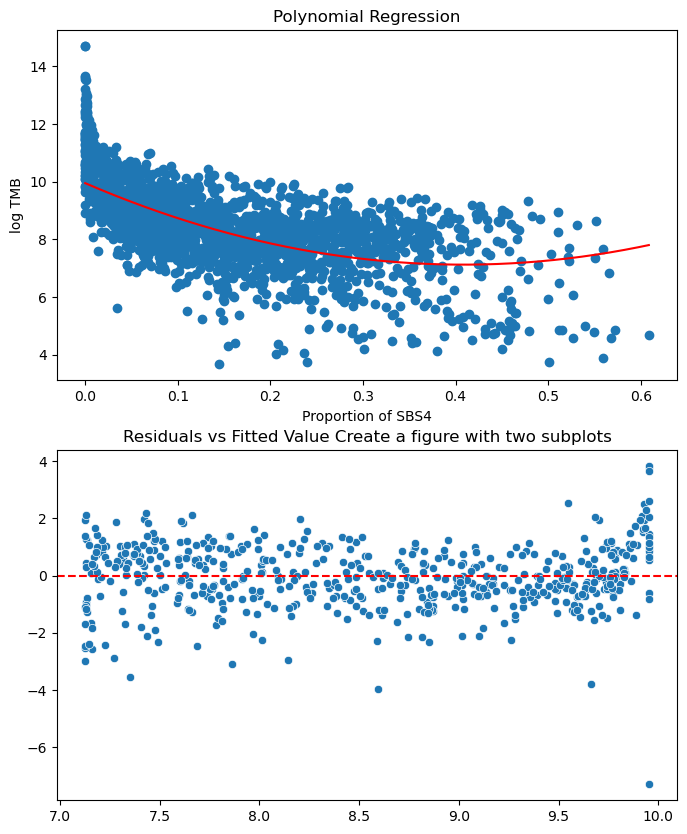

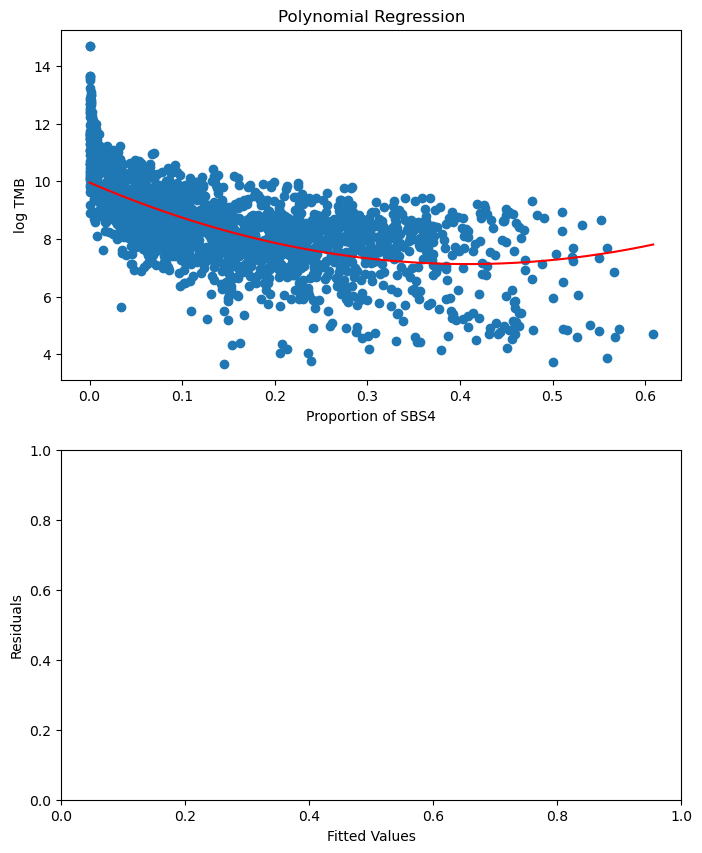

In [39]:
# Select features (only signature 4) and target (log of TMB)
X = signatures_df[['SBS1']].values
y = signatures_df['transformed_TMB'].values

# First we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will work with a second degree polynomial, that will be enough
degree = 2
# We will define that the features are polinomial and define a linear model to solve a polinomial transformation
pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
# Fit our data points into our pipeline
pm.fit(X_train, y_train)

# Predict on the test set
y_pred = pm.predict(X_test)
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient of SBS4 proportion square: {model.coef_[0]}')
# Print mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root of Mean Squared Error: {rmse}')
# Print rsquare score (amount of variance of the dependent variable explained by the independent one)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

# Generate some values to print the a continous polynomial function
X_values = np.linspace(min(X_train), max(X_train), 1000).reshape(-1, 1)
# Predict the values from our polynomial regression model
y_predict = pm.predict(X_values)
 
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(X_train, y_train)  # plot original data points
ax1.set_title('Polynomial Regression')
ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
ax1.set_xlabel('Proportion of SBS4')
ax1.set_ylabel('log TMB')

# Plot residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Fitted Value Create a figure with two subplots')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(X_train, y_train)  # plot original data points
ax1.set_title('Polynomial Regression')
ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
ax1.set_xlabel('Proportion of SBS4')
ax1.set_ylabel('log TMB')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Save the figure
fig.savefig(path.join('plots', 'SBS1_TMB_PolynomialRegression.png'))
fig.show()

Here it is relevant to discuss the behaviour of SBS1. As stated above, it is a mutational process present in mostly all types of cells (healthy ones included, it usually reflects the dominant mutational processes across the cells of the human body and even species: https://www.nature.com/articles/s41586-022-04618-z). The polynomial regression here reflects that cells with high proportions of this 'base' mutational process  tend to have less mutations than others, although still there is a large variance that shoulb de explained by the presence of other mutational processes. Here the residuals whos a pattern more compatible with homoskedasticity.

Therefore, after reviewing the relationships with these key signatures we can conclude that we will need a combination of them to explain a large part of the variance in the order of magnitude of mutations. However, the fact that all the variables are proportions (they are not entirely independent since they all sum 1) will have implications since that largely **violates the assumption of absence in collinearity**. This, in turn, will generate problems on the model through estimations of artefactually large parameters (regression coeficients) during the training phase.

To assess the strength for collinearity between independent variables, we can compute the **Variation Inflation Factor (VIF)**:

$$ \text{VIF} = \frac{1}{1 - R^2} $$

where $R^2$ is the unadjusted correlation coefficient of the one variable against all the others. This statistic ranges from 1 to +Inf, being 1 no correlation at all and infinite a total correlation. The **Tolerance Index**, which is the denominator, is also used.

In [40]:
# Function to compute VIF using sklearn linear model.
def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

# Work only with the independent variables to compute VIF
sklearn_vif(exogs=list(signatures_df.columns[1:-3]), data=signatures_df)

,VIF,Tolerance
SBS1,inf,0.0
SBS2,inf,0.0
SBS3,inf,0.0
SBS4,inf,0.0
SBS5,inf,0.0
SBS6,inf,0.0
SBS7,inf,0.0
SBS8,inf,0.0
SBS9,inf,0.0
SBS10,inf,0.0


Obviously, since all the variables sum up to 1, the correlation of one against the other is absolute. Given that this collinearity is structural, that means, it comes mostly due to the own definition of the variables into proportions, and that moderate levels will not affect severely the model, it can be partially fixed by standarizing the independent variables directly from the TMB and reducing the collinearity.

In [41]:
from sklearn.preprocessing import StandardScaler

# Standardize the variables
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(raw_signatures_df[raw_signatures_df.columns[1:]]), columns=raw_signatures_df.columns[1:])
df_standardized.insert(0, 'specimenID', raw_signatures_df['specimenID'])

# Merge with the signatures dataframe to get the dependent variable
df_standardized = pd.merge(df_standardized, TMB_df , left_on='specimenID', right_on='specimenID', how='inner')

In [42]:
# Work only with the independent variables to compute VIF
VIF_df = sklearn_vif(exogs=list(df_standardized.columns[1:-3]), data=df_standardized[df_standardized.columns[1:-3]])
VIF_df

,VIF,Tolerance
SBS1,2.176947,0.459359
SBS2,3.044044,0.328510
SBS3,1.908257,0.524038
SBS4,2.908317,0.343841
SBS5,4.414657,0.226518
SBS6,7.243938,0.138046
SBS7,7.086583,0.141112
SBS8,2.172063,0.460392
SBS9,1.413465,0.707481
SBS10,1.264960,0.790539


In [46]:
VIF_df['VIF'].mean()

2.432457484575874

A rule of a thumb is to consider high levels of collinearity with VIF greater than 4. The mean across independent variables is below that, but some of them are above that value. Considering the large amount of variables a filtering step removing any signature above 2.5 will remove around half of the features with more collinearity.

In [43]:
# Work only with the independent variables to compute VIF
df_standardized = df_standardized.drop(columns=list(VIF_df[VIF_df['VIF']>2.5].index))

# Work only with the independent variables to compute VIF
VIF_df = sklearn_vif(exogs=list(df_standardized.columns[1:-3]), data=df_standardized[df_standardized.columns[1:-3]])
VIF_df['VIF'].mean()

1.3730473750674472

We can further restrict the amount of features (signatures). For instance we can select the top most relevant features (a process called **feature selection**) or even use **dimensionality reduction** methodologies such as the ones explained on a previous section. 

Here, we will try to apply a **feature selection** process known as **Recursive Feature Elimination (RFE)**, which consists on developing/training the model while removing recursively the less relevant features until defining a model with a desired number of features.

In [48]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

# This function will perform a multiple polynomial regression while doinf a RFE of the k best features.
def multiple_polynomial_regression_RFE(signatures_df, indep_variable, degree, k_best):
    
    # Select features
    features = signatures_df.columns[1:-3]
    X = signatures_df[features]
    y = signatures_df[indep_variable]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the pipeline, this time we will do an estimation before using a support vector linear regression
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=k_best)
    pm = make_pipeline(selector, PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())

    # Fit the data points into the pipeline
    pm.fit(X_train, y_train)

    # Test the model and plot residuals
    y_pred = pm.predict(X_test)
    residuals = y_test - y_pred

    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Print root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root of Mean Squared Error: {rmse}')
    # Print rsquare score (amount of variance of the dependent variables explained by the independent one)
    print(f'R^2 score: {r2_score(y_test, y_pred)}')
    
    # Get the selected features using the RFE indices and the corresponding names to show them.
    selected_feature_indices = np.where(selector.support_)[0]
    selected_features = signatures_df.columns[2:-3][selected_feature_indices]
    print(f'Top {k_best} selected features: {selected_features}')

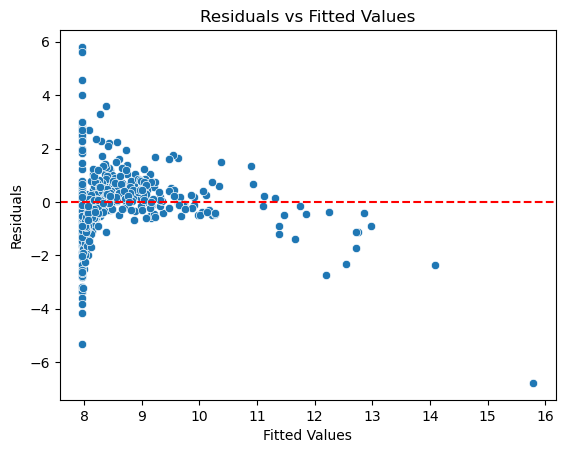

Root of Mean Squared Error: 1.2230530770272765
R^2 score: 0.29481318300425585
Top 2 selected features: Index(['SBS37', 'SBS76'], dtype='object')


In [49]:
# Work with the top 2 best features, it might take some time.
degree = 2
k_best = 2
multiple_polynomial_regression_RFE(df_standardized, 'transformed_TMB', degree, k_best)

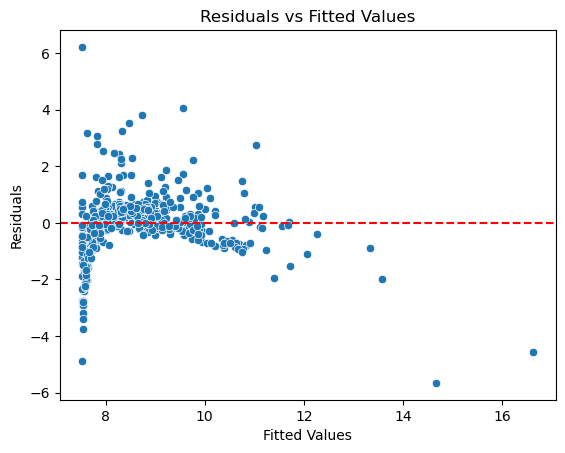

Root of Mean Squared Error: 1.0186928364785723
R^2 score: 0.5107846447168108
Top 5 selected features: Index(['SBS11', 'SBS15', 'SBS26', 'SBS37', 'SBS76'], dtype='object')


In [50]:
# Work with the top 5 best features, it might take some time.
degree = 2
k_best = 5
multiple_polynomial_regression_RFE(df_standardized, 'transformed_TMB', degree, k_best)

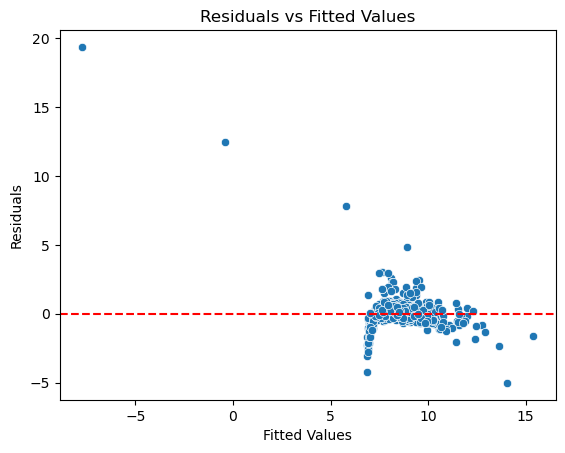

Root of Mean Squared Error: 1.3107559611099608
R^2 score: 0.19005177376871396
Top 10 selected features: Index(['SBS3', 'SBS11', 'SBS15', 'SBS26', 'SBS37', 'SBS62', 'SBS66', 'SBS70',
       'SBS75', 'SBS76'],
      dtype='object')


In [51]:
# Work with the top 10 best features, it might take some time.
degree = 2
k_best = 10
multiple_polynomial_regression_RFE(df_standardized, 'transformed_TMB', degree, k_best)

After training several models the one with the better performance if we use the RMSE as metric is the one with that uses 5 signatures. However, a close look to the distribution of errors it is clear that there is no homoskedasticity. Furthermore, the mean squared error indicates mean deviations on the predictions of around on order of magnitude of the amount of mutations, which from a predictive point of view does not seem to very powerful to use the signature composition to predict the raw amount of mutations (even if they are not entirely independent, at least for some of the signatures, the features).

There are much more other factors that have an influence on the amount of mutations of a tumor (the age of the patient is one, as shown on the linear regression example) and not even working with large amounts of data (and build large models) can lead to useful models.

However, we can try to build models restricting to specific types of tumors. This might remove a lot of the variance due to the own idiosincracy of the tumor type and the dynamics of the tissue where it arises. For instance, we can restrict the model to melanomas only, which is a type with a large variance in TMB and enough samples in the dataset.

In [52]:
# Take the specimen IDs exclusive from melanomas and subset
melanoma_specimens = TMB_df[TMB_df['hist_type']=='Skin_Melanoma']['specimenID']
unprocessed_melanoma_df = raw_signatures_df[raw_signatures_df['specimenID'].isin(melanoma_specimens)].copy()

# Find signature (features) present in melanoma sample (exclude non present)
sumover = unprocessed_melanoma_df[unprocessed_melanoma_df.columns[1:]].sum()
valid_features = sumover[sumover!=0.0].index

# Standardize the variables
scaler = StandardScaler()
melanoma_df = pd.DataFrame(scaler.fit_transform(unprocessed_melanoma_df[unprocessed_melanoma_df.columns[1:]]), columns=unprocessed_melanoma_df.columns[1:])[valid_features]
melanoma_df.insert(0, 'specimenID', list(unprocessed_melanoma_df['specimenID']))

# Merge with the signatures dataframe to get the dependent variable
melanoma_df = pd.merge(melanoma_df, TMB_df, left_on='specimenID', right_on='specimenID', how='inner')

In [53]:
# Work only with the independent variables to compute VIF
VIF_df = sklearn_vif(exogs=list(melanoma_df.columns[1:-3]), data=melanoma_df[melanoma_df.columns[1:-3]])
VIF_df

,VIF,Tolerance
SBS1,10.371577,0.096417
SBS6,27.694831,0.036108
SBS7,13.047610,0.076642
SBS9,3.950154,0.253155
SBS12,7.710732,0.129689
SBS17,1.549426,0.645400
SBS19,2.740462,0.364902
SBS28,3.491946,0.286373
SBS30,13.554921,0.073774
SBS36,6.042249,0.165501


In [54]:
VIF_df['VIF'].mean()

6.946882476028106

The mean here is higher, which means that for this specific cancer (removed a lot of variability coming from cancer type) in general the different signatures are highly correlated. Given the relatively low amount of features, we can apply another feature selection method which is similar to **RFE** but uses cross-validation to find the optimal number of features (it might be computationally more expensive but can provide better results): **Recursive Feature Elimination with Cross-Validation (RFECV)**.

In [64]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# This function will perform a multiple polynomial regression while doinf a RFECV of the k best features.
def multiple_polynomial_regression_RFECV(signatures_df, indep_variable, degree):
    
    # Select features
    features = signatures_df.columns[1:-3]
    X = signatures_df[features]
    y = signatures_df[indep_variable]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the pipeline, this time we will do an estimation before using a support vector linear regression
    estimator = SVR(kernel="linear")
    selector = RFECV(estimator, step=1, cv=5)
    pm = make_pipeline(selector, PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    
    # Fit the data points into the pipeline
    pm.fit(X_train, y_train)

    # Test the model and plot residuals
    y_pred = pm.predict(X_test)
    residuals = y_test - y_pred

    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Print root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root of Mean Squared Error: {rmse}')
    # Print rsquare score (amount of variance of the dependent variable explained by the independent one)
    print(f'R^2 score: {r2_score(y_test, y_pred)}')
    
    # Get the selected features using the RFECV
    selected_feature_indices = np.where(selector.support_)[0]
    selected_features = signatures_df.columns[2:-3][selected_feature_indices]
    print(f'selected features: {selected_features}')
    
    # Print a 2D plot if there is only one feature
    if len(selected_features) == 1:
        selected_feature = selected_features[0]
        
        # Accessing the coefficients and intercept
        coefficients = pm.named_steps['linearregression'].coef_
        intercept = pm.named_steps['linearregression'].intercept_
        print(f'Coefficients: {coefficients}')
        print(f'Intercept: {intercept}')

        # Create the figure
        plt.scatter(X_test[selected_feature], y_test, color='blue', label='Actual Data')

        # Generate some values to print the a continous polynomial function
        X_values = np.linspace(min(X_train[selected_feature]), max(X_train[selected_feature]), 1000)
        # Predict the values from our polynomial regression model
        y_predict = (X_values**2)*coefficients[1] + X_values*coefficients[0] + intercept

        # Plot the regression line
        plt.plot(X_values, y_predict, color='red', linewidth=2, label='Polynomial Regression')

        # Labeling the plot
        plt.title('Polynomial Regression')
        plt.xlabel(selected_feature)
        plt.ylabel('log TMB')
        plt.legend()

        plt.show()

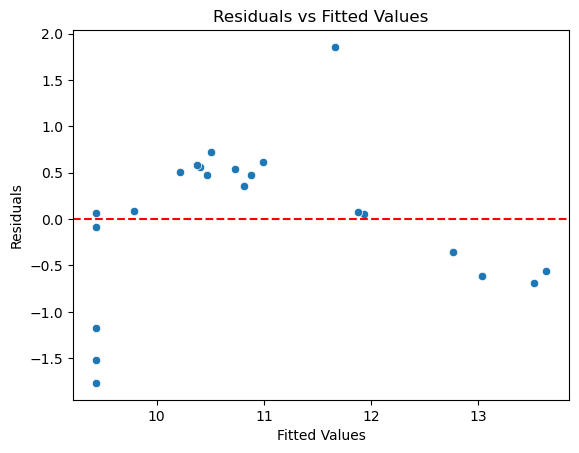

Root of Mean Squared Error: 0.8049887000300433
R^2 score: 0.7410881829066363
selected features: Index(['SBS9'], dtype='object')
Coefficients: [ 2.0463012  -0.41891006]
Intercept: 11.24675997023311


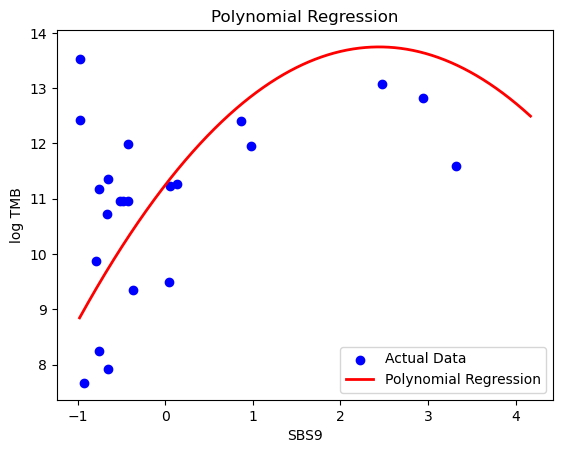

In [65]:
# Find the best features, it might take some time.
degree = 2
multiple_polynomial_regression_RFECV(melanoma_df, 'transformed_TMB', degree)

The model has a higher predictive ability, but still there is a large heteroskedasticity. However, in my experience the SBS7 signature is the one that mostly defines the melanoma mutation burden.

In [59]:
# This function will perform a multiple polynomial regression while doinf a RFECV of the k best features.
def multiple_polynomial_regression(signatures_df, indep_variable, feature, degree):
    
    # Select feature
    X = signatures_df[feature].values.reshape(-1,1)
    y = signatures_df[indep_variable].values
    
    # First we split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # We will define that the features are polinomial and define a linear model to solve a polinomial transformation
    pm = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    # Fit our data points into our pipeline
    pm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pm.predict(X_test)
    # Print the coefficients
    intercept = pm[1].intercept_
    print(f'Intercept: {intercept}')
    coefficients = pm[1].coef_
    print(f'Coefficients: {coefficients}')
    # Print mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root of Mean Squared Error: {rmse}')
    # Print rsquare score (amount of variance of the dependent variable explained by the independent one)
    print(f'R^2 score: {r2_score(y_test, y_pred)}')

    # Generate some values to print the a continous polynomial function
    X_values = np.linspace(min(X_train), max(X_train), 1000)
    # Predict the values from our polynomial regression model
    y_predict = pm.predict(X_values)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    ax1.scatter(X_train, y_train)  # plot original data points
    ax1.set_title('Polynomial Regression')
    ax1.plot(X_values, y_predict, color='r')  # plot our best fit curve
    ax1.set_xlabel('Feature')
    ax1.set_ylabel('Indep variable')

    # Plot residuals to check for homoskedasticity
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals)
    ax2.axhline(y=0, color='r', linestyle='--')
    ax2.set_title('Residuals vs Fitted Values')
    ax2.set_xlabel('Fitted Values')
    ax2.set_ylabel('Residuals')

    return(fig)

We can try with different degrees.

Intercept: 10.871252698290078
Coefficients: [1.26533612]
Root of Mean Squared Error: 1.168123740250747
R^2 score: 0.4548073335866676


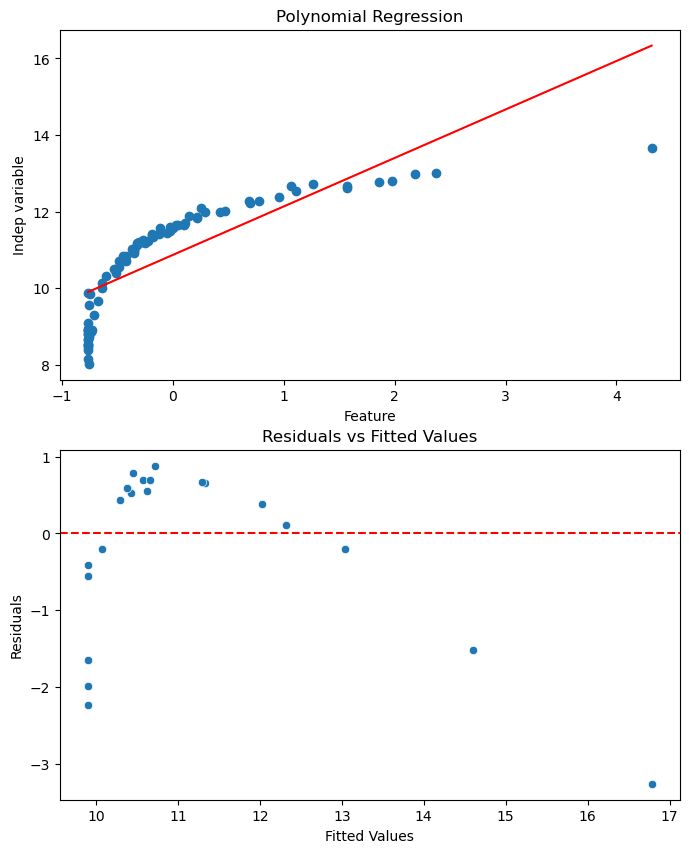

In [63]:
degree = 1
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

Intercept: 11.24675997023311
Coefficients: [ 2.0463012  -0.41891006]
Root of Mean Squared Error: 0.8049887000300433
R^2 score: 0.7410881829066363


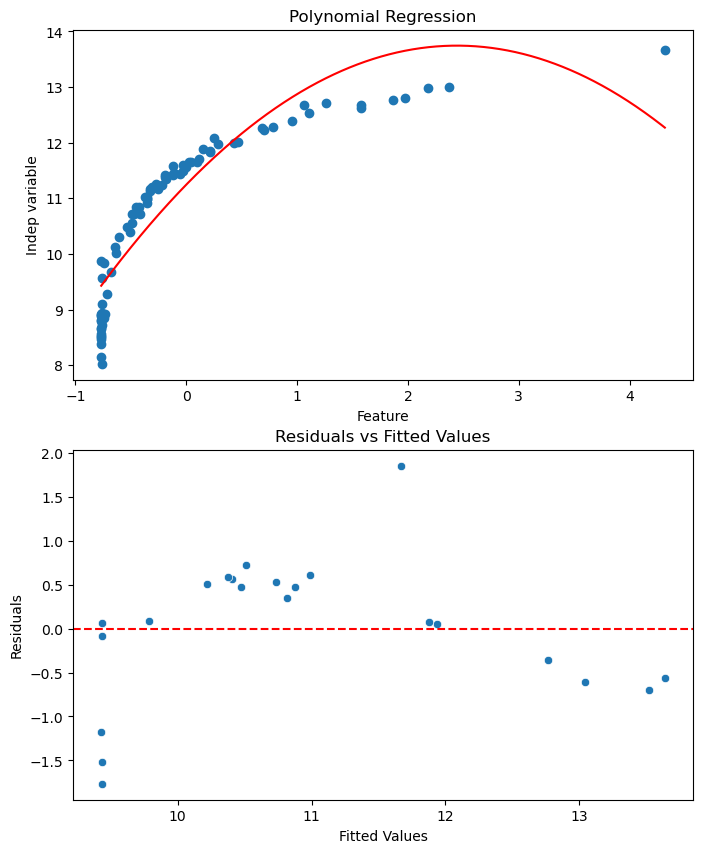

In [60]:
degree = 2
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

Intercept: 11.684926385816942
Coefficients: [ 2.2610615  -1.3533703   0.21919868]
Root of Mean Squared Error: 0.62888599143995
R^2 score: 0.8419785122496071


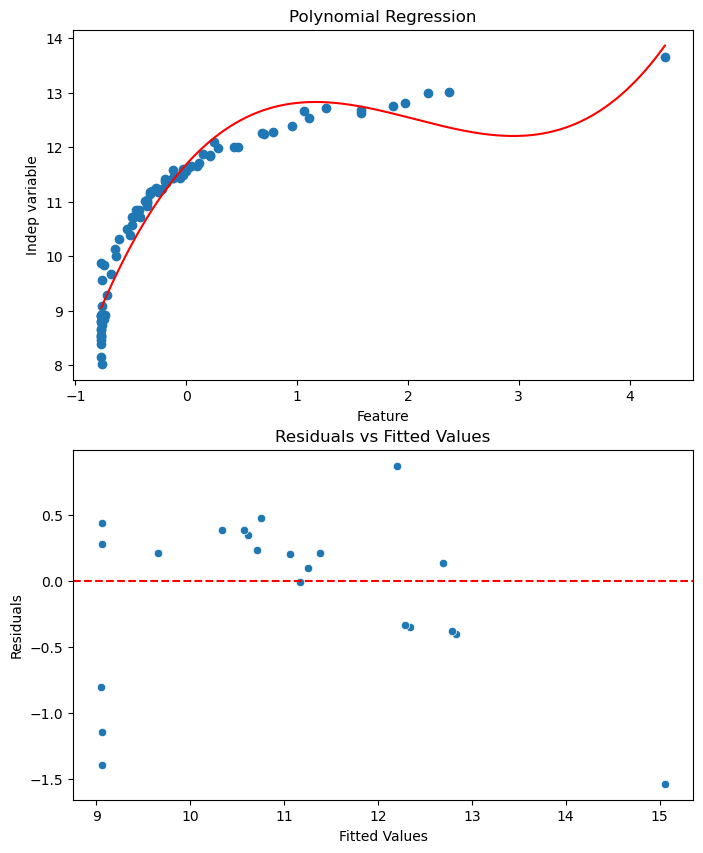

In [61]:
degree = 3
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

Intercept: 11.77887233907974
Coefficients: [ 1.64969366 -1.93480183  0.95343166 -0.13218059]
Root of Mean Squared Error: 0.6508776450302426
R^2 score: 0.8307334993902704


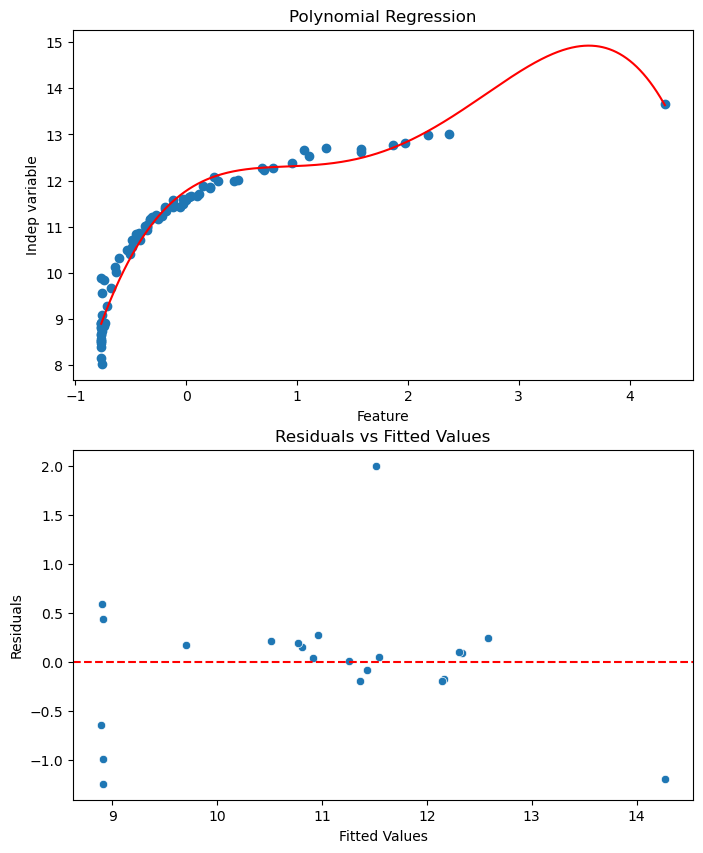

In [62]:
degree = 4
fig = multiple_polynomial_regression(melanoma_df, 'transformed_TMB', 'SBS7', degree)
fig.show()

Notice the underfitting while using a linear model (degree 1), and the error generally diminishes as the model becomes more complex (increases the degree), however, we can notice that the model overfits to predict an outlier which probably impairs its predictability on other datasets.